<a href="https://colab.research.google.com/github/rzqynptr/Matematika-Diskrit-24083010042-Amelia/blob/main/24083010042_Amelia_Rizqyna_Putri_Tugas_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

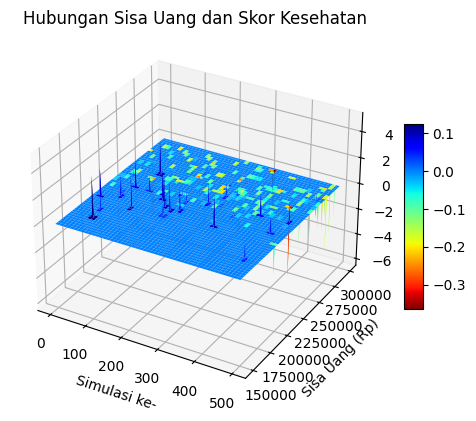


=== HASIL ANALISIS SIMULASI ===
>> (1) Pola Makan Sehat
Jumlah individu dengan pola sehat : 106
Indeks pola sehat (maks 20): [1, 7, 8, 15, 17, 19, 20, 31, 33, 41, 43, 44, 52, 56, 60, 63, 64, 70, 77, 78]

>> (2) Pola Sehat sekaligus Hemat
Jumlah individu pola sehat & hemat : 106
Indeks kandidat (maks 20): [1, 7, 8, 15, 17, 19, 20, 31, 33, 41, 43, 44, 52, 56, 60, 63, 64, 70, 77, 78]

>> (3) Pola Juara (Skor Tertinggi)
Pola terbaik terdapat pada ID : 295
   Skor Total : 103.697
   Skor Sehat : 0.800
   Sisa Budget: Rp 188,000

>> (4) Jadwal Konsumsi Harian (31 Hari)
   Hari  Menu Pagi Menu Malam
 Hari 1    mieayam ayamgeprek
 Hari 2   gorengan     seblak
 Hari 3 ayamgeprek ayamgeprek
 Hari 4 nasipadang   gorengan
 Hari 5    mieayam       roti
 Hari 6      bakso   gorengan
 Hari 7     capcay      bakso
 Hari 8     capcay     seblak
 Hari 9 ayamgeprek nasi telur
Hari 10      bakso     seblak
Hari 11 ayamgeprek     seblak
Hari 12     warteg     warteg
Hari 13 nasipadang    mieayam
Hari 14 a

In [ ]:
# ==============================================
# SIMULASI POLA MAKAN & ANALISIS KESEHATAN
# ==============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ==============================
# 1. Persiapan Data & Parameter
# ==============================

NPM = 42
np.random.seed(NPM)

# Pastikan nama file sesuai dengan file CSV kamu
makan = pd.read_csv("makanan (2).csv")

# Parameter dasar
BUDGET_AWAL = 1_000_000  # rupiah
SAMPLE_NUM = 500         # jumlah individu/simulasi
HARI = 31                # jumlah hari simulasi

# Bobot dasar (mean distribusi normal)
W_KENYANG_BASE = 0.8
W_RASA_BASE = 0.7
W_SEHAT_BASE = 0.9
W_BOSAN_BASE = 0.2

# =======================================
# 2. Inisialisasi Variabel Penyimpanan
# =======================================

skor = np.zeros(SAMPLE_NUM)
sisa = np.zeros(SAMPLE_NUM)
sehat = np.zeros(SAMPLE_NUM)
resp_pilih = np.zeros((SAMPLE_NUM, HARI * 2))  # tiap hari 2 kali makan

SISA_MINIMUM = 150_000
SISA_MAKSIMUM = 300_000
bin_sisa = np.arange(SISA_MINIMUM, SISA_MAKSIMUM, 1_000)
resp_sehat = np.zeros((SAMPLE_NUM, len(bin_sisa)))

# ======================
# 3. Simulasi Pola Makan
# ======================

for n in range(SAMPLE_NUM):
    budget = BUDGET_AWAL
    skor_kumulatif = 0
    skor_sehat = 0

    for hari in range(HARI):
        # ----- Makan Pagi -----
        pilihan_pagi = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(W_KENYANG_BASE, 0.2)
        w_rasa = np.random.normal(W_RASA_BASE, 0.2)
        w_sehat = np.random.normal(W_SEHAT_BASE, 0.4)
        w_bosan = np.random.normal(W_BOSAN_BASE, 0.2)

        skor_kumulatif += (
            w_kenyang * makan["kenyang"][pilihan_pagi]
            + w_rasa * makan["rasa"][pilihan_pagi]
            + w_sehat * makan["sehat"][pilihan_pagi]
            - w_bosan * makan["bosan"][pilihan_pagi]
        )
        skor_sehat += makan["sehat"][pilihan_pagi] - 0.5
        budget -= makan["harga"][pilihan_pagi]
        resp_pilih[n][2 * hari] = pilihan_pagi

        # ----- Makan Malam -----
        pilihan_malam = np.random.randint(0, len(makan))
        w_kenyang = np.random.normal(W_KENYANG_BASE, 0.2)
        w_rasa = np.random.normal(W_RASA_BASE, 0.2)
        w_sehat = np.random.normal(W_SEHAT_BASE + 0.2, 0.4)
        w_bosan = np.random.normal(W_BOSAN_BASE * 2, 0.2)

        skor_kumulatif += (
            w_kenyang * makan["kenyang"][pilihan_malam]
            + w_rasa * makan["rasa"][pilihan_malam]
            + w_sehat * makan["sehat"][pilihan_malam]
            - w_bosan * makan["bosan"][pilihan_malam]
        )
        skor_sehat += makan["sehat"][pilihan_malam] - 0.5
        budget -= makan["harga"][pilihan_malam]
        resp_pilih[n][2 * hari + 1] = pilihan_malam

    # Simpan hasil simulasi individu ke-n
    sisa[n] = budget
    skor[n] = skor_kumulatif
    sehat[n] = skor_sehat

    bin_index = int((budget - SISA_MINIMUM) / 1000)
    if 0 <= bin_index < len(bin_sisa):
        resp_sehat[n][bin_index] = skor_sehat

# ======================
# 4. Visualisasi 3D
# ======================

fig = plt.figure()
ax = fig.add_subplot(projection="3d")
Y, X = np.meshgrid(bin_sisa, np.arange(SAMPLE_NUM))

surf = ax.plot_surface(X, Y, resp_sehat, cmap="jet_r", edgecolor="none")
ax.set_title("Hubungan Sisa Uang dan Skor Kesehatan")
ax.set_xlabel("Simulasi ke-")
ax.set_ylabel("Sisa Uang (Rp)")
ax.set_zlabel("Skor Kesehatan")

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()

# ======================
# 5. Analisis Hasil
# ======================

print("\n=== HASIL ANALISIS SIMULASI ===")

# (1) Pola sehat (skor sehat > 0)
pola_sehat = [i for i, val in enumerate(sehat) if val > 0]
print(">> (1) Pola Makan Sehat")
print(f"Jumlah individu dengan pola sehat : {len(pola_sehat)}")
print(f"Indeks pola sehat (maks 20): {pola_sehat[:20]}\n")

# (2) Pola sehat & hemat (sehat > 0 dan sisa uang positif)
pola_sehat_hemat = [i for i in pola_sehat if sisa[i] > 0]
print(">> (2) Pola Sehat sekaligus Hemat")
print(f"Jumlah individu pola sehat & hemat : {len(pola_sehat_hemat)}")
print(f"Indeks kandidat (maks 20): {pola_sehat_hemat[:20]}\n")

# (3) Cari juara (skor tertinggi di antara kandidat)
print(">> (3) Pola Juara (Skor Tertinggi)")
if pola_sehat_hemat:
    id_juara = max(pola_sehat_hemat, key=lambda idx: skor[idx])
    print(f"Pola terbaik terdapat pada ID : {id_juara}")
    print(f"   Skor Total : {skor[id_juara]:,.3f}")
    print(f"   Skor Sehat : {sehat[id_juara]:,.3f}")
    print(f"   Sisa Budget: Rp {int(sisa[id_juara]):,}\n")

    # (4) Jadwal makan juara
    print(">> (4) Jadwal Konsumsi Harian (31 Hari)")
    pilihan_menu = resp_pilih[id_juara]
    jadwal_data = []

    for hari in range(HARI):
        idx_pagi = pilihan_menu[2 * hari]
        idx_malam = pilihan_menu[2 * hari + 1]

        if pd.notna(idx_pagi) and 0 <= int(idx_pagi) < len(makan):
            menu_pagi = makan["makanan"].iloc[int(idx_pagi)]
        else:
            menu_pagi = "—"

        if pd.notna(idx_malam) and 0 <= int(idx_malam) < len(makan):
            menu_malam = makan["makanan"].iloc[int(idx_malam)]
        else:
            menu_malam = "—"

        jadwal_data.append([f"Hari {hari + 1}", menu_pagi, menu_malam])

    df_jadwal = pd.DataFrame(jadwal_data, columns=["Hari", "Menu Pagi", "Menu Malam"])
    print(df_jadwal.to_string(index=False))
else:
    print("Tidak ada individu yang memenuhi syarat sehat & hemat.\n")

1. Pola Makan Sehat

Berdasarkan hasil simulasi terhadap 500 individu dengan variasi pola konsumsi makanan selama 31 hari, diperoleh 106 individu yang memiliki skor kesehatan kumulatif positif.
Artinya, sekitar 21,2% dari total simulasi menghasilkan pola makan yang secara keseluruhan memberikan dampak kesehatan yang baik (nilai sehat > 0). Hal ini menunjukkan bahwa tidak semua kombinasi makanan harian menghasilkan kondisi kesehatan yang optimal. Faktor seperti keseimbangan menu, variasi makanan, serta nilai nutrisi (rasa, kenyang, sehat, dan bosan) memiliki pengaruh terhadap hasil akhir skor kesehatan.

2. Pola Sehat sekaligus Hemat

Dari 106 pola makan sehat tersebut, seluruhnya juga menunjukkan sisa anggaran positif di akhir periode simulasi. Dengan kata lain, semua individu yang berhasil menjaga pola makan sehat juga mampu mengatur pengeluaran dengan efisien (tidak melebihi batas anggaran Rp 1.000.000).
Hal ini menandakan bahwa menjaga kesehatan melalui pilihan makanan yang baik tidak selalu membutuhkan biaya tinggi. Kombinasi menu yang seimbang dan variatif justru dapat memberikan hasil optimal dari sisi kesehatan maupun ekonomi.

3. Skor tertinggi

Dari seluruh pola makan sehat dan hemat, pola dengan ID 295 tercatat memiliki skor total tertinggi, yaitu 103,697, dengan skor kesehatan sebesar 0,800 serta sisa anggaran Rp 188.000.
Pola ini dapat dianggap sebagai pola konsumsi paling ideal selama periode simulasi karena memberikan keseimbilan terbaik antara aspek rasa, kenyang, kesehatan, dan efisiensi biaya.

4. Jadwal Konsumsi Harian Terbaik

Berdasarkan hasil pemilihan menu harian pada pola terbaik, terlihat bahwa makanan seperti ayam geprek, mie ayam, dan nasi padang mendominasi daftar konsumsi harian, baik untuk menu pagi maupun malam.
Disusul oleh menu seperti seblak, bakso, dan roti sebagai variasi tambahan. Pola ini menunjukkan preferensi yang cenderung pada makanan berprotein tinggi dan mengenyangkan, dengan beberapa variasi makanan berkarbohidrat serta bercita rasa kuat.
Meskipun terdapat pengulangan pada beberapa jenis makanan, hasil simulasi tetap menunjukkan nilai kesehatan positif. Hal ini mengindikasikan bahwa faktor kombinasi porsi dan frekuensi berperan penting dalam menentukan keseimbangan antara rasa kenyang, kepuasan rasa, dan aspek kesehatan secara keseluruhan.

5. Visualisasi 3D

Grafik 3D yang dihasilkan memperlihatkan hubungan antara sisa anggaran (Rp) dan skor kesehatan kumulatif untuk setiap individu simulasi.
Sebagian besar titik berada pada area positif dengan rentang sisa anggaran 150.000–300.000 rupiah, menunjukkan bahwa semakin efisien pengeluaran seseorang, semakin besar peluangnya untuk tetap mempertahankan skor kesehatan yang baik.
Distribusi warna pada grafik juga memperlihatkan variasi kecil antara individu, yang menandakan adanya keragaman dalam pola konsumsi yang efektif—tidak ada satu jenis menu tunggal yang selalu menghasilkan hasil terbaik, melainkan kombinasi yang seimbang antar faktor.

Prompt GPT

input: Dari file python tersebut, bagaimana code untuk Mencari pola makan dengan nilai kumulatif kesehatan positif?

output: pola_sehat = [i for i, val in enumerate(sehat) if val > 0]
print(">> (1) Pola Makan Sehat")
print(f"Jumlah individu dengan pola sehat : {len(pola_sehat)}")
print(f"Indeks pola sehat (maks 20): {pola_sehat[:20]}\n")


input: Lalu untuk mencari titik-titik dengan sisa uang bulanan positif dari (1)?

output: pola_sehat_hemat = [i for i in pola_sehat if sisa[i] > 0]
print(">> (2) Pola Sehat sekaligus Hemat")
print(f"Jumlah individu pola sehat & hemat : {len(pola_sehat_hemat)}")
print(f"Indeks kandidat (maks 20): {pola_sehat_hemat[:20]}\n")

input: bantu saya untuk menyelesaikan pertanyaan no 3 dan 4

output:# (3) Cari juara (skor tertinggi di antara kandidat)
print(">> (3) Pola Juara (Skor Tertinggi)")
if pola_sehat_hemat:
    id_juara = max(pola_sehat_hemat, key=lambda idx: skor[idx])
    print(f"Pola terbaik terdapat pada ID : {id_juara}")
    print(f"   Skor Total : {skor[id_juara]:,.3f}")
    print(f"   Skor Sehat : {sehat[id_juara]:,.3f}")
    print(f"   Sisa Budget: Rp {int(sisa[id_juara]):,}\n")

    # (4) Jadwal makan juara
    print(">> (4) Jadwal Konsumsi Harian (31 Hari)")
    pilihan_menu = resp_pilih[id_juara]
    jadwal_data = []

    for hari in range(HARI):
        idx_pagi = pilihan_menu[2 * hari]
        idx_malam = pilihan_menu[2 * hari + 1]

        if pd.notna(idx_pagi) and 0 <= int(idx_pagi) < len(makan):
            menu_pagi = makan["makanan"].iloc[int(idx_pagi)]
        else:
            menu_pagi = "—"

        if pd.notna(idx_malam) and 0 <= int(idx_malam) < len(makan):
            menu_malam = makan["makanan"].iloc[int(idx_malam)]
        else:
            menu_malam = "—"

        jadwal_data.append([f"Hari {hari + 1}", menu_pagi, menu_malam])

    df_jadwal = pd.DataFrame(jadwal_data, columns=["Hari", "Menu Pagi", "Menu Malam"])
    print(df_jadwal.to_string(index=False))
else:
    print("Tidak ada individu yang memenuhi syarat sehat & hemat.\n")


input: code untuk grafik 3d nya bisa diperbaiki lagi?

output: fig = plt.figure()
ax = fig.add_subplot(projection="3d")
Y, X = np.meshgrid(bin_sisa, np.arange(SAMPLE_NUM))

surf = ax.plot_surface(X, Y, resp_sehat, cmap="jet_r", edgecolor="none")
ax.set_title("Hubungan Sisa Uang dan Skor Kesehatan")
ax.set_xlabel("Simulasi ke-")
ax.set_ylabel("Sisa Uang (Rp)")
ax.set_zlabel("Skor Kesehatan")

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)
plt.show()
